# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Prazka Aldiyuda]
- **Email:** [m295d4ky2383@bangkit.academy]
- **ID Dicoding:** [prazka]

## Menentukan Pertanyaan Bisnis

1.   Apa pengaruh cuaca terhadap peminjaman sepeda?
2.   Apa pengaruh hari terhadap peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [143]:
df = pd.read_csv("https://raw.githubusercontent.com/prazka/BikeAnalysis/main/hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.26,0.60,0.16,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.26,0.60,0.16,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.26,0.60,0.16,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.27,0.56,0.13,13,48,61


### Assessing data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [145]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [146]:
print("Jumlah data duplikasi: ", df.duplicated().sum())

Jumlah data duplikasi:  0


### Cleaning data

Mengatasi Outlier

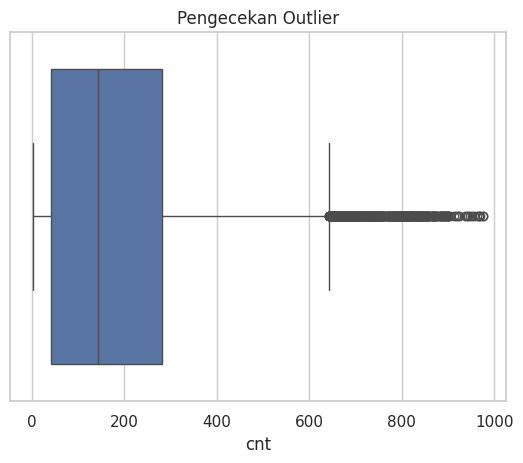

In [147]:
sns.boxplot(x="cnt", data=df)
plt.title("Pengecekan Outlier")
plt.show()

In [148]:
df_clean = df.copy()
Q1 = (df_clean['cnt']).quantile(0.25)
Q3 = (df_clean['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df_clean['cnt'] < minimum
kondisi_more_than = df_clean['cnt'] > maximum

df_clean.drop(df_clean[kondisi_lower_than].index, inplace=True)
df_clean.drop(df_clean[kondisi_more_than].index, inplace=True)

#### Dilakukan pembersihan data outlier menggunakan metode Drop

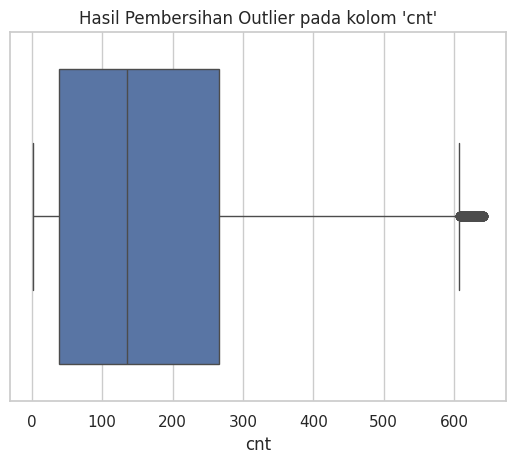

In [149]:
sns.boxplot(x="cnt", data=df_clean)
plt.title("Hasil Pembersihan Outlier pada kolom 'cnt'")
plt.show()

## Exploratory Data Analysis (EDA)

In [150]:
df_clean.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.00,16874,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00,16874.00
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.17,NaN,2.49,0.49,6.51,11.46,0.03,3.00,0.68,1.43,0.49,0.47,0.63,0.19,33.42,139.29,172.71
std,5007.77,NaN,1.11,0.50,3.46,6.96,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,45.90,126.05,155.02
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4219.25,NaN,1.00,0.00,4.00,5.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,32.00,38.00
50%,8438.50,NaN,2.00,0.00,7.00,11.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.18,15.00,111.00,135.00
75%,12832.75,NaN,3.00,1.00,10.00,18.00,0.00,5.00,1.00,2.00,0.64,0.62,0.79,0.25,45.00,208.00,265.75


Beberapa informasi yang bisa didapatkan adalah seperti
- Rata rata pengguna tidak menggunakan sepeda pada hari libur
- Rata rata jumlah penyewa harian ada di angka 172 sepeda
- dari 172 tersebut rata rata 30 orang merupakan orang yang belum registrasi dan 140 sisanya sudah registrasi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pengaruh cuaca terhadap peminjaman sepeda?

In [151]:
df_use = df_clean.copy()

# Membuat variabel map untuk mengubah menjadi deskriptif
df_use['weathersit'] = df_use['weathersit'].map({1: 'Cerah', 2: 'Mendung', 3: 'Hujan Ringan', 4: 'Hujan Lebat'})

# Mengatur urutan kelas
weathersit_order = ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat']

# Membuat pivot tabel untuk rata-rata jumlah peminjaman sepeda terhadap variabel cuaca dan musim
pivot_weathersit = df_use.groupby(by=["weathersit"]).agg({
    "cnt": "median"
}).reindex(weathersit_order, fill_value=0).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Median jumlah peminjaman sepeda terhadap keadaan cuaca :")
print(pivot_weathersit.to_string(index=False))


Median jumlah peminjaman sepeda terhadap keadaan cuaca :
  weathersit    cnt
       Cerah 152.00
     Mendung 128.00
Hujan Ringan  62.00
 Hujan Lebat  36.00


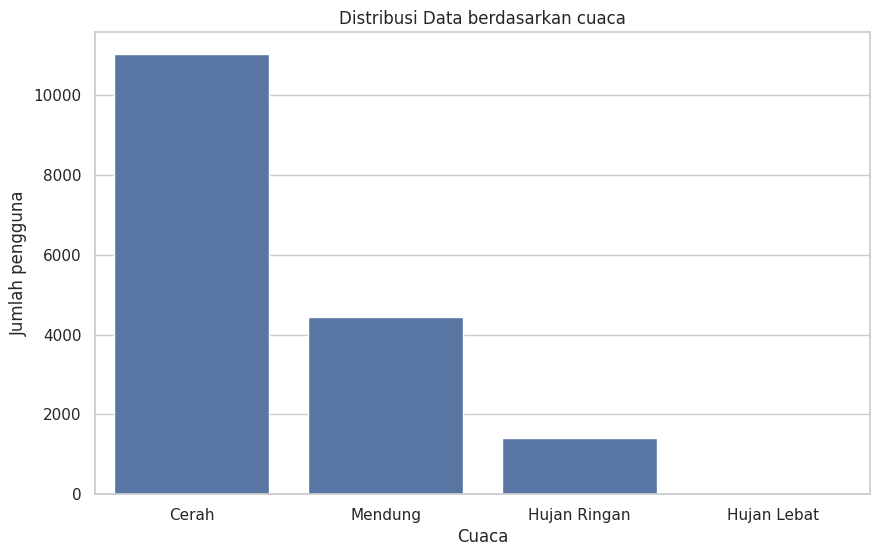

In [152]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='weathersit', data=df_use)
plt.title('Distribusi Data berdasarkan cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah pengguna')

plt.show()

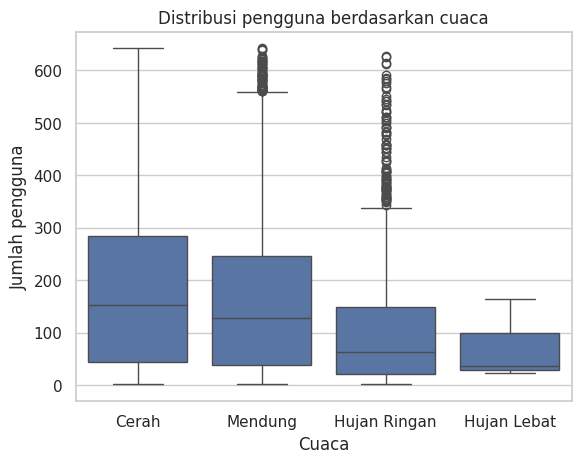

In [153]:
sns.boxplot(x="weathersit", y="cnt", data=df_use)
plt.title("Distribusi pengguna berdasarkan cuaca")
plt.xlabel('Cuaca')
plt.ylabel('Jumlah pengguna')
plt.show()


### Pertanyaan 2: Apa pengaruh hari terhadap peminjaman sepeda?

In [154]:
df_use = df_clean.copy()# Membuat variabel map untuk mengubah menjadi deskriptif
df_use['weekday'] = df_use['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
pivot_weekday = df_use.groupby(by=["weekday"]).agg({
    "cnt": "median"
}).reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']).reset_index()

print("Median jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))

Median jumlah peminjaman sepeda terhadap hari :
weekday    cnt
  Senin 132.00
 Selasa 138.00
   Rabu 135.00
  Kamis 146.00
  Jumat 158.00
  Sabtu 123.00
 Minggu 113.00


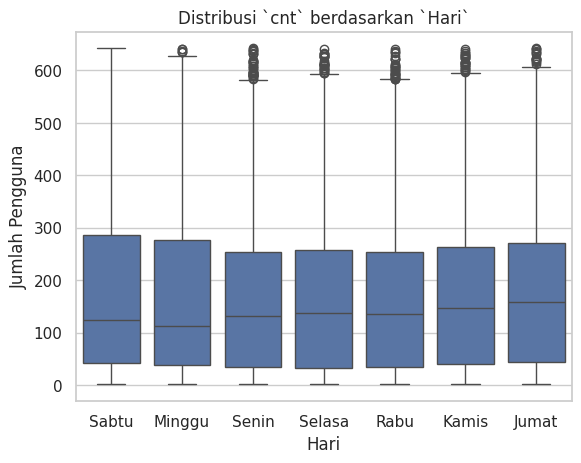

In [155]:
sns.boxplot(x="weekday", y="cnt", data=df_use)
plt.title("Distribusi `cnt` berdasarkan `Hari`")
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.show()


## Conclusion

1.   Apa pengaruh cuaca terhadap peminjaman sepeda?
**Kesimpulannya** adalah cuaca sangat mempengaruhi jumlah sepeda yang digunakan dimana bisa dilihat pada sebaran data pada saat kondisi cuaca cerah sangat banyak sekali yang meminjam sepeda dibandingkan saat berawan, hujan ringan maupun lebat. Hal ini juga didukung oleh perhitungan median dimana didapati nilai dari media peminjaman sepeda atau CNT pada saat cuaca cerah adalah 159, sedangkan ketika mendung senilai 133 selain itu  ketika hujan ringan adalah Hujan Ringan 63.00 dan terakhir Hujan Lebat senilai 36.00 alasan perhitungan median karena banyak sekali outlier dalam data yang digunakan.

2.  Apa Pengaruh Hari Terhadap Peminjaman sepeda
**Kesimpulannya** adalah terjadi tren pola dimana jumlah pengguna meningkat dari hari senin menuju hari jumat dan terjadi penurunan pada hari sabtu dan minggu hal ini bisa dilihat pada hasil median setiap harinya. Alasan penggunaan median adalah karena banyaknya outlier yang dapat mempengaruhi perhitungan.

In [156]:
df_use.to_csv("all_data.csv", index=False)